<h1 align="center">  Linear Regression </h1>

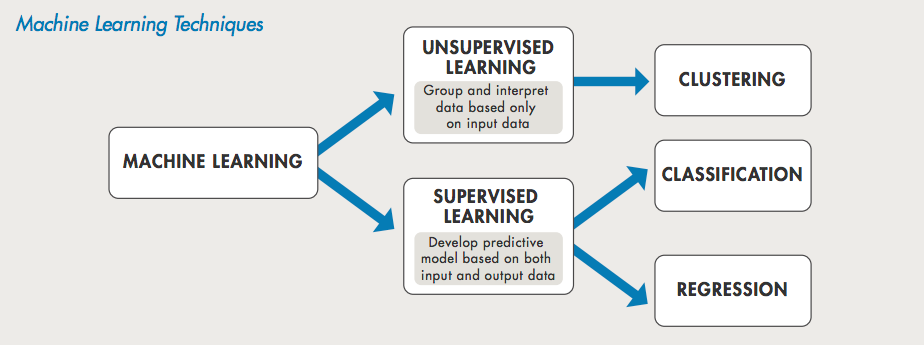

In [1]:
from IPython.display import Image
Image(filename='ml.png',  width=750, height=350)

## Univariate Linear Regression with python and numpy 






### Load the Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk 
import matplotlib.pyplot as plt 


In [3]:
dataset = pd.read_csv('dataset.txt')

In [5]:
dataset.head(2)
# dataset[:5]

,X,y
0,6.1101,17.5920
1,5.5277,9.1302


In [6]:
dataset.tail()

,X,y
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [8]:
X_train = dataset['X']
y_train = dataset['y']

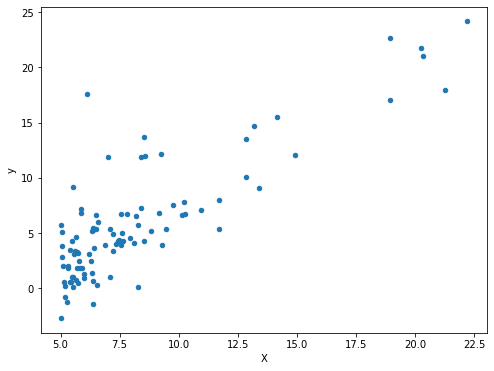

In [9]:
dataset.plot(x="X", y="y", kind="scatter", figsize=(8,6))

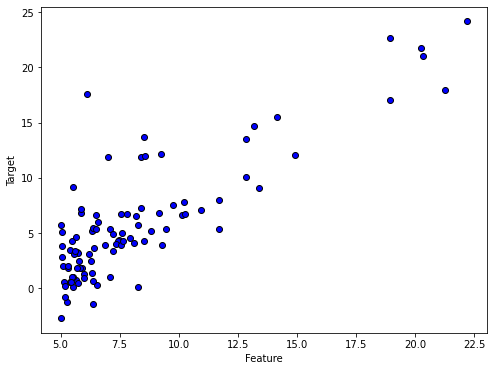

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x = X_train, y = y_train, color='blue', edgecolor='k')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


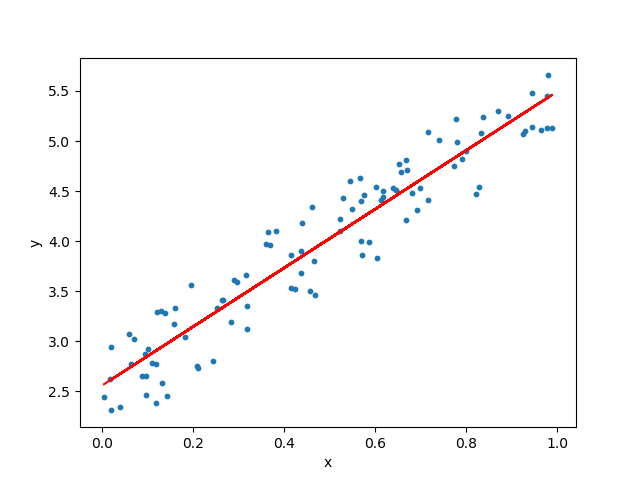

In [108]:
from IPython.display import Image
Image(filename='lr2.png',  width=650, height=450)

### Compute the Cost $J(\theta)$
---

The goal of linear regression is to minimize the cost function(mean square error)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [11]:
def cost_function(X, y, theta):
    m = len(X)
    y_pred = np.dot(X, theta)
    error = (y_pred - y)**2
    return 1/(2*m)*np.sum(error)

In [12]:
X_train.shape , y_train.shape

((97,), (97,))

In [22]:
trainig_example = len(X_train) 
X = np.append(np.ones((trainig_example, 1)), X_train.values.reshape(trainig_example, 1), axis = 1)
y = y_train.values.reshape(trainig_example, 1)

theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [ ]:
X

In [13]:
o = np.ones((3, 1))
o

array([[1.],
       [1.],
       [1.]])

In [14]:
z = np.zeros((3,1))
z

array([[0.],
       [0.],
       [0.]])

In [16]:
np.append(o, z, axis=1)

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
cost_function(X, y, theta)

32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [24]:
def gradient_descent(X, y, theta, alpha, iteration):
    m = len(X)
    costs = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        error = np.dot(X.T, (y_pred - y))
        theta = theta - alpha*(1/m)*error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [25]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iteration = 2000)

print('h(x) = {} + {}x1'.format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


In [26]:
costs[-5:-1]

[4.478042965883364, 4.478039106078355, 4.478035260176142, 4.478031428126646]

### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

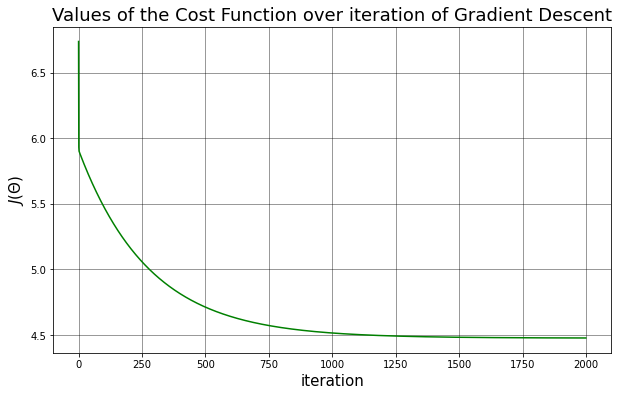

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(costs, 'g')
plt.grid(color = 'black', alpha = 0.5)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('$J(\Theta)$', fontsize = 15)
plt.title('Values of the Cost Function over iteration of Gradient Descent', fontsize = 18);

### Training Data with Linear Regression Fit
---

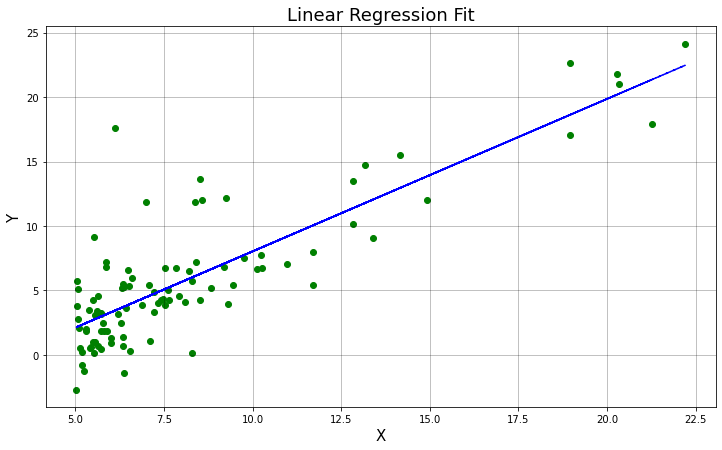

In [28]:
plt.figure(figsize = (12, 7))

theta = np.squeeze(theta)
plt.scatter(x = X_train, y = y_train, color = 'g')

x_value = [x for x in X_train]
y_value = [(x*theta[1] + theta[0]) for x in x_value]
plt.plot(x_value, y_value,'b--')

plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.title('Linear Regression Fit', fontsize = 18);

### Predict using $\theta$ values


$h_\theta(x) = \theta^Tx$

In [29]:
def predict(x, theta):
    y_pred = np.dot(theta.T, x)
    return y_pred

In [30]:
theta

array([-3.78806857,  1.18221277])

In [31]:
y_pred_test = predict(np.array([1, 7.5]), theta)
y_pred_test

5.078527237957215

### Univariate Linear Regression with sklearn

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
reg_model = LinearRegression()
reg_model.fit(X, y)
print("R2 Score: ", reg_model.score(X, y))

R2 Score:  0.7020315537841397


In [35]:
# h(x) = -3.79 + 1.18x1
print('h(x) = {} + {}x1'.format(str(round(reg_model.intercept_[0], 2)),
                                str(round(reg_model.coef_[0, 1], 2))))


h(x) = -3.9 + 1.19x1


In [36]:
y_pred_scratch = predict(X.T, theta)
print("R2 Score: ", r2_score(y_pred_scratch, y))

R2 Score:  0.5676552601132834


## Multiple Linear Regression with python and numpy 

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n$$

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
print(boston.DESCR)

In [ ]:
boston[0]

In [45]:
import pandas as pd
X = #boston feature
Y = #boston target   


In [75]:
d = pd.read_csv('house_price_prediction.csv')

In [76]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


### Multiple Linear Regression with Sklearn